In [5]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator


In [20]:
json_dir = "test_sessions/session_v2/json_logs"
json_files = glob.glob(os.path.join(json_dir, "stats_*.json"))
print(f"Gefundene JSON-Dateien: {len(json_files)}")

Gefundene JSON-Dateien: 63


In [22]:
all_entries = []
x_vals = []
y_vals = []
steps = []
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
    print(f"{file}: {len(data)} Einträge")
    all_entries.extend(data)
    for entry in data:
        # Es wird angenommen, dass "x" und "y" als Zahlen gespeichert sind
        x = entry.get("x", None)
        y = entry.get("y", None)
        step = entry.get("step", None)
        if x is not None and y is not None:
            x_vals.append(x)
            y_vals.append(y)
        if step is not None:
            steps.append(step)

test_sessions/session_v2/json_logs\stats_1743256941.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743256990.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257039.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257088.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257137.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257186.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257234.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257282.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257332.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257381.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257430.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257479.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257529.json: 81920 Einträge
test_sessions/session_v2/json_logs\stats_1743257578

In [23]:
print(f"Gesamte Einträge geladen: {len(all_entries)}")
print(f"Gesammelte Koordinatenpaare: {len(x_vals)}")

Gesamte Einträge geladen: 5160960
Gesammelte Koordinatenpaare: 5160960


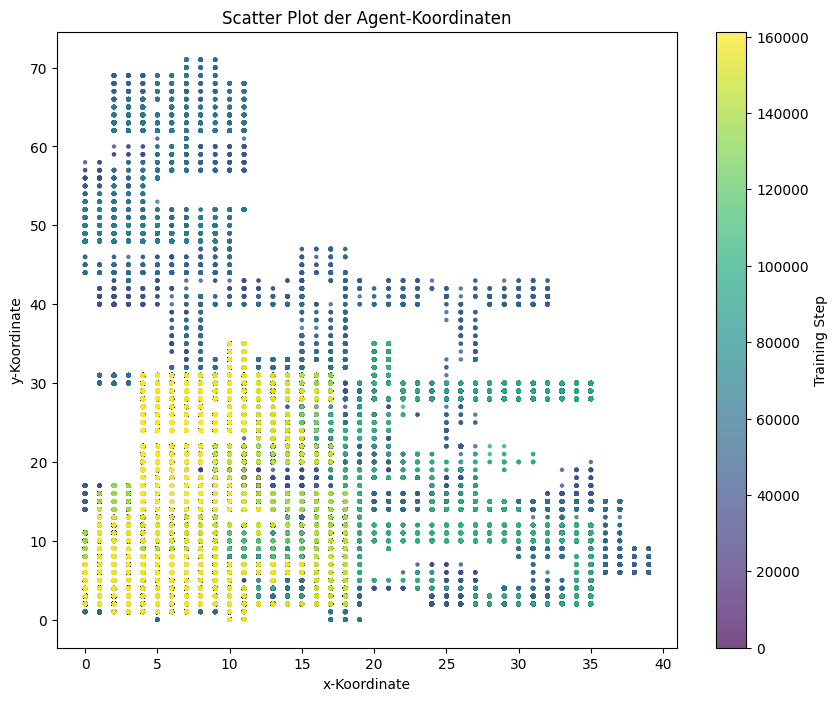

In [25]:
plt.figure(figsize=(10, 8))
if steps:
    # Färbe nach Trainingsschritt, falls vorhanden
    sc = plt.scatter(x_vals, y_vals, c=steps, cmap='viridis', s=5, alpha=0.7)
    plt.colorbar(sc, label='Training Step')
else:
    plt.scatter(x_vals, y_vals, s=5, alpha=0.7)
plt.title("Scatter Plot der Agent-Koordinaten")
plt.xlabel("x-Koordinate")
plt.ylabel("y-Koordinate")
plt.show()

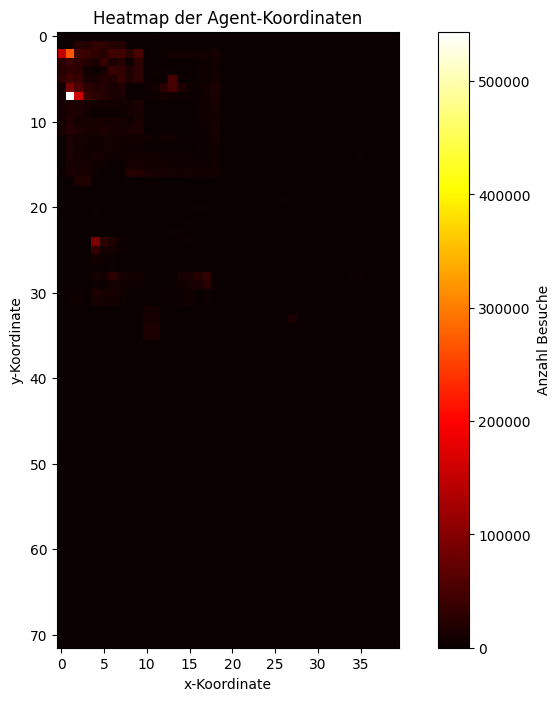

In [24]:
if x_vals and y_vals:
    max_x = int(max(x_vals)) + 1
    max_y = int(max(y_vals)) + 1
else:
    max_x, max_y = 100, 100  # Fallback, falls keine Daten vorhanden sind

heatmap = np.zeros((max_y, max_x))  # y als Zeilen, x als Spalten
for x, y in zip(x_vals, y_vals):
    # Umwandeln in int, falls nötig
    heatmap[int(y), int(x)] += 1

plt.figure(figsize=(10, 8))
plt.imshow(heatmap, cmap='hot', interpolation='nearest', origin='upper')
plt.colorbar(label="Anzahl Besuche")
plt.title("Heatmap der Agent-Koordinaten")
plt.xlabel("x-Koordinate")
plt.ylabel("y-Koordinate")
plt.show()